In [1]:
# Import libraries needed to train models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Loading  the dataset
df = pd.read_csv("ElectricVehicle.csv")

# This will Verify that the dataset is loaded correctly
print("Dataset Overview:")
print(df.head())  # Displaying the first few rows 
print("\nDataset Info:")
print(df.info())  # Display information about the data (column names, non-null counts)


Dataset Overview:
   VIN (1-10)    County       City State  Postal Code  Model Year        Make  \
0  1N4AZ0CP8D      King  Shoreline    WA      98177.0        2013      NISSAN   
1  5YJSA1E45K      King    Seattle    WA      98112.0        2019       TESLA   
2  WVGUNPE28M    Kitsap     Olalla    WA      98359.0        2021  VOLKSWAGEN   
3  JTDKARFP6H  Thurston    Olympia    WA      98501.0        2017      TOYOTA   
4  1FADP5CU9G  Thurston    Olympia    WA      98506.0        2016        FORD   

         Model                   Electric Vehicle Type  \
0         LEAF          Battery Electric Vehicle (BEV)   
1      MODEL S          Battery Electric Vehicle (BEV)   
2         ID.4          Battery Electric Vehicle (BEV)   
3  PRIUS PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
4        C-MAX  Plug-in Hybrid Electric Vehicle (PHEV)   

                      Clean Alternative Fuel Vehicle  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible            75.0   
1 

In [3]:
# Selecting the features and target variable
target = 'Clean Alternative Fuel Vehicle'
features = ['Model Year', 'Electric Range', 'Base MSRP', 'State', 'Make']

# Dropping rows with missing values in the selected features
df.dropna(subset=features + [target], inplace=True)

# Encode categorical variable
encoder = LabelEncoder()
df['State'] = encoder.fit_transform(df['State'])
df['Make'] = encoder.fit_transform(df['Make'])
df[target] = encoder.fit_transform(df[target])

# Train and test split 70/30
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [4]:
# Standardise features makes the values of each feature in the data have zero-mean
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



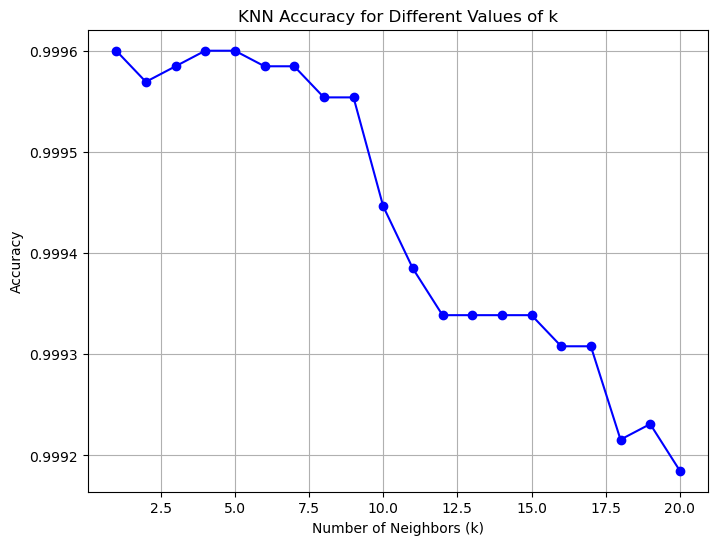

In [6]:
# Hyperparameter tuning - Finding the optimal k to train model
accuracy_scores = []
k_values = range(1, 21)  # Try k from 1 to 20

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

# Graph for accuracy scores of the differebt values of k values
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.title('KNN Accuracy for Different Values of k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


In [11]:
# Finding the optimal k and its accuracy
best_k = k_values[np.argmax(accuracy_scores)]
best_accuracy = max(accuracy_scores)
print(f"Best k: {best_k}, Accuracy: {best_accuracy * 100:.2f}%")

# Training the model with the optimal k
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)

# Make the predictions and evaluate them
y_pred = best_knn.predict(X_test_scaled)

# Evaluation of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nFinal Model Accuracy: {accuracy * 100:.2f}%")

#Display the report of the best K 
print("\nFinal Classification Report:")
print(classification_report(y_test, y_pred))

Best k: 1, Accuracy: 99.96%

Final Model Accuracy: 99.96%

Final Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21215
           1       1.00      1.00      1.00     37374
           2       1.00      1.00      1.00      6437

    accuracy                           1.00     65026
   macro avg       1.00      1.00      1.00     65026
weighted avg       1.00      1.00      1.00     65026

